In [2]:
# Imports from the base Python Libraries

import time
import requests
from collections import Counter
from StringIO import StringIO

# Imports for the Dataframe handling libraries

import pandas as pd
import numpy as np

# Selective Imports for the Machine Learning Library

from sklearn import preprocessing

In [3]:
# The code was removed by DSX for sharing.

,Gender,College,In or Out of State,Citizenship,Marital Status,Type of High School,Applied Financial Aid,Received Financial Aid,Other Scholarships,Tuition Rate,...,Student Health,Total Class Hours,Overall GPA,Change in GPA,Housing,Club Memberships,Infirmary Visits,City,State,Retention
0,Female,Liberal Arts & Sciences,Out of State,Yes,Single,Private,Yes,Yes,No,1975,...,Good,26,3.615000,Negative,On Campus,2,0,"Huntsville, AL",Alabama,Retained
1,Male,Health Sciences,Out of State,Yes,Single,Public,Yes,No,No,1975,...,Good,31,2.807742,Positive,On Campus,3,0,"Birmingham, AL",Alabama,Retained
2,Male,Engineering,Out of State,Yes,Married,Private,Yes,Yes,Yes,1975,...,Good,27,3.473333,Negative,Off Campus,0,0,"Birmingham, AL",Alabama,Retained
3,Male,Business,Out of State,Yes,Single,Public,No,No,No,1975,...,Good,31,3.466774,Positive,On Campus,0,0,"Birmingham, AL",Alabama,Retained
4,Male,Communications,Out of State,Yes,Single,Private,Yes,Yes,No,1975,...,Good,31,3.089677,Positive,On Campus,2,0,"Birmingham, AL",Alabama,Retained


In [4]:
#Encode the string columns

le = preprocessing.LabelEncoder()
data['In or Out of State'] = le.fit_transform(data['In or Out of State'])
data['Citizenship'] = le.fit_transform(data['Citizenship']) 
data['Applied Financial Aid'] = le.fit_transform(data['Applied Financial Aid']) 
data['Received Financial Aid'] = le.fit_transform(data['Received Financial Aid']) 
data['Other Scholarships'] = le.fit_transform(data['Other Scholarships']) 
data['Retention'] = le.fit_transform(data['Retention'])
data['Marital Status'] = le.fit_transform(data['Marital Status'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Housing'] = le.fit_transform(data['Housing'])
data['Student Health'] = le.fit_transform(data['Student Health'])
data['Change in GPA'] = le.fit_transform(data['Change in GPA'])
data['College'] = le.fit_transform(data['College'])
data['Type of High School'] = le.fit_transform(data['Type of High School'])
data['Tuition Rate'] = le.fit_transform(data['Tuition Rate'])
data['HS Class Rank'] = le.fit_transform(data['HS Class Rank'])
data['High School Class Size'] = le.fit_transform(data['High School Class Size'])
data['Recruited Athlete'] = le.fit_transform(data['Recruited Athlete'])
data['Acceptance Type'] = le.fit_transform(data['Acceptance Type'])
data['City'] = le.fit_transform(data['City'])

In [5]:
data.head()

,Gender,College,In or Out of State,Citizenship,Marital Status,Type of High School,Applied Financial Aid,Received Financial Aid,Other Scholarships,Tuition Rate,...,Student Health,Total Class Hours,Overall GPA,Change in GPA,Housing,Club Memberships,Infirmary Visits,City,State,Retention
0,0,6,1,1,2,0,1,1,0,1,...,0,26,3.615000,0,3,2,0,63,Alabama,1
1,1,5,1,1,2,1,1,0,0,1,...,0,31,2.807742,2,3,3,0,20,Alabama,1
2,1,3,1,1,1,0,1,1,1,1,...,0,27,3.473333,0,2,0,0,20,Alabama,1
3,1,0,1,1,2,1,0,0,0,1,...,0,31,3.466774,2,3,0,0,20,Alabama,1
4,1,1,1,1,2,0,1,1,0,1,...,0,31,3.089677,2,3,2,0,20,Alabama,1


In [6]:
#CHECK FOR MISSING COLUMNS
print "Missing values by column"
for col in data.columns:
    print col, len(data[pd.isnull(data[col])])

Missing values by column
Gender 0
College 0
In or Out of State 0
Citizenship 0
Marital Status 0
Type of High School 0
Applied Financial Aid 0
Received Financial Aid 0
Other Scholarships 0
Tuition Rate 0
Expected 4 Year Revenue 0
Open Houses 0
Visits 0
High School GPA 0
AP Tests Passed 0
Acceptance Type 0
Recruited Athlete 0
High School Class Size 0
HS Class Rank 0
Student Health 0
Total Class Hours 0
Overall GPA 0
Change in GPA 0
Housing 0
Club Memberships 0
Infirmary Visits 0
City 0
State 0
Retention 0


Looks like there were not any missing columns in the data. Let's create a correlation matrix to see what are the most important factors for retention:

In [7]:
# Pandas dataframes provides an easy way to generate this matrix
data_corr = data.corr(method='spearman')
#data_corr = data_corr.abs()  
data_corr.fillna(0.0, inplace=True)

In [8]:
data_corr

,Gender,College,In or Out of State,Citizenship,Marital Status,Type of High School,Applied Financial Aid,Received Financial Aid,Other Scholarships,Tuition Rate,...,HS Class Rank,Student Health,Total Class Hours,Overall GPA,Change in GPA,Housing,Club Memberships,Infirmary Visits,City,Retention
Gender,1.000000,0.004646,0.014552,-0.005659,-0.032082,-0.019860,0.019974,0.025160,-0.001916,0.014552,...,0.003798,-0.027569,0.005475,0.007272,0.016379,0.006551,0.005120,0.009420,-0.025916,-0.005910
College,0.004646,1.000000,0.000265,0.003018,-0.009922,0.012431,0.001449,0.009118,0.018792,0.000265,...,-0.004415,-0.008813,0.016798,0.003745,-0.017538,0.015899,0.006914,0.000720,0.012603,-0.009309
In or Out of State,0.014552,0.000265,1.000000,-0.005429,-0.011133,0.006316,-0.005194,-0.001174,-0.005254,1.000000,...,-0.017920,0.029942,-0.017737,0.009016,-0.015399,-0.018428,0.003850,-0.004198,0.109196,0.016133
Citizenship,-0.005659,0.003018,-0.005429,1.000000,0.057070,-0.000133,0.001468,0.006383,0.031884,-0.005429,...,0.005023,0.004650,-0.009379,-0.009926,-0.013537,0.013948,0.007031,0.008900,0.002308,0.015808
Marital Status,-0.032082,-0.009922,-0.011133,0.057070,1.000000,-0.010423,0.019549,0.011872,-0.006166,-0.011133,...,0.014273,-0.031551,-0.004330,0.009830,-0.010311,0.249251,-0.011224,-0.020862,0.011531,0.123127
Type of High School,-0.019860,0.012431,0.006316,-0.000133,-0.010423,1.000000,-0.004364,-0.009262,-0.015051,0.006316,...,0.001094,0.019837,0.022643,0.001857,-0.001173,-0.008031,0.001049,0.001948,-0.007598,-0.018257
Applied Financial Aid,0.019974,0.001449,-0.005194,0.001468,0.019549,-0.004364,1.000000,0.899434,0.008023,-0.005194,...,-0.004477,-0.025467,-0.020477,0.000255,-0.011376,-0.053691,-0.001711,0.029706,0.010319,-0.062789
Received Financial Aid,0.025160,0.009118,-0.001174,0.006383,0.011872,-0.009262,0.899434,1.000000,0.003727,-0.001174,...,-0.015629,-0.026893,-0.017717,0.004767,-0.011168,-0.049163,-0.000695,0.037261,0.019582,-0.053113
Other Scholarships,-0.001916,0.018792,-0.005254,0.031884,-0.006166,-0.015051,0.008023,0.003727,1.000000,-0.005254,...,0.022404,-0.015177,-0.012122,-0.014721,0.016925,0.009189,0.006153,0.009443,0.002044,0.012768
Tuition Rate,0.014552,0.000265,1.000000,-0.005429,-0.011133,0.006316,-0.005194,-0.001174,-0.005254,1.000000,...,-0.017920,0.029942,-0.017737,0.009016,-0.015399,-0.018428,0.003850,-0.004198,0.109196,0.016133


That looks nice, but it's easier to see this matrix using a heatmap:

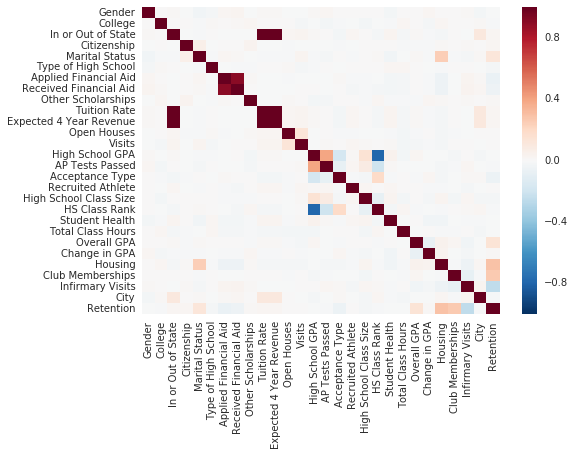

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
import numpy as np

sns.heatmap(data_corr.T)

By looking at retention on the bottom right, it looks like the main factors are:

- Drop the unessicary columns
- Marital Status
- Overall GPA (Interesting! Since basic statistics in the first notebook didn't show that!)
- Housing
- Club Memberships
- Infirmary Visits


Now let's shape the data. First we will drop all columns that didn't seem to factor into retention. We will also drop the retention column since it's the target.

In [10]:
#Extract the feature Matrix
#X_data = data.drop('Retention', axis=1)
X_data = data
X_data = X_data.drop('City', axis=1)
X_data = X_data.drop('Gender', axis=1)
X_data = X_data.drop('College', axis=1)
X_data = X_data.drop('In or Out of State', axis=1)
X_data = X_data.drop('Citizenship', axis=1)
X_data = X_data.drop('Other Scholarships', axis=1)
X_data = X_data.drop('Tuition Rate', axis=1)
X_data = X_data.drop('Expected 4 Year Revenue', axis=1)
X_data = X_data.drop('Open Houses', axis=1)
X_data = X_data.drop('Visits', axis=1)
X_data = X_data.drop('High School GPA', axis=1)
X_data = X_data.drop('AP Tests Passed', axis=1)
X_data = X_data.drop('Acceptance Type', axis=1)
X_data = X_data.drop('Recruited Athlete', axis=1)
X_data = X_data.drop('Type of High School', axis=1)
X_data = X_data.drop('HS Class Rank', axis=1)
X_data = X_data.drop('High School Class Size', axis=1)
X_data = X_data.drop('Student Health', axis=1)
X_data = X_data.drop('Total Class Hours', axis=1)
X_data = X_data.drop('Change in GPA', axis=1)
X_data = X_data.drop('State', axis=1)
X_dataWithTarget = X_data
X_data = X_data.drop('Retention', axis=1)

X_data.head()

,Marital Status,Applied Financial Aid,Received Financial Aid,Overall GPA,Housing,Club Memberships,Infirmary Visits
0,2,1,1,3.615000,3,2,0
1,2,1,0,2.807742,3,3,0
2,1,1,1,3.473333,2,0,0
3,2,0,0,3.466774,3,0,0
4,2,1,1,3.089677,3,2,0


This shapes the data into a matrix that our ML algoritms can consume. First we have the factors that influence retention:

In [11]:
X_data.shape

(6203, 7)

Now we shape the target "what we want to predict" column:

In [12]:
y_data = data['Retention']
y_data.shape

(6203,)

This part creates the ML algorithm for deployment:

In [12]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data, random_state=1)

In [13]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [14]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.82914248871695684

Conclusion: It looks like we can predict with ~83% accuracy, using a Gaussian algorithm. Ironically, Guassian is one of the simpiler methods, and with this, the most effective. Going forward, we could deploy this manually to a server, or keep it in the notebook for use.

Below is some more experimentation. This is common to see in notebooks as the data scientist strives for more accuracy:

### Singular Value Decomposition


In [15]:
def SVD(dependent, target):
    #Singular Value Decomposition
    import matplotlib.pyplot as pit
    import numpy as np
    from sklearn.preprocessing import scale 
    from scipy.linalg import svd
    
    x = dependent
    y = target
    
    # Proceed By Scaling the x varible w.r.t its mean
    # with_mean=False,with_std=False <- Data not Measured the same in dependent
    # with_mean=True,with_std=False <- Data Measured the same in dependent
    
    x_s = scale(x,with_mean=False,with_std=False,axis=0)
    
    # Decompose the matrix using SW technique.We will use SVO implementation in scipy.
    U,S,V = svd(x_s,full_matrices=False)
    
    x_t = U[:,:2]
    
    # Finally we plot the datasets with the reduced components.
    plt.figure(1)
    plt.scatter(x_t[:,0],x_t[:,1],c=y)
    plt.xlabel("Component 1") 
    plt.ylabel("Component 2") 
    plt.show()

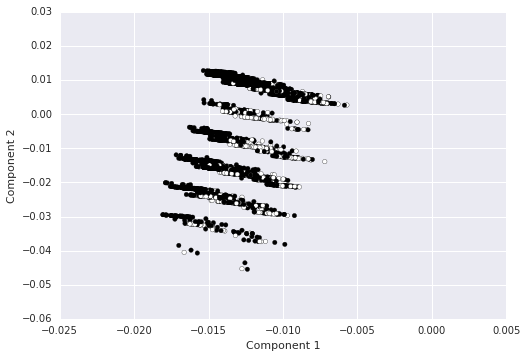

In [16]:
SVD(X_data, y_data)

In [17]:
X_dataWithTarget.head()

,Marital Status,Applied Financial Aid,Received Financial Aid,Overall GPA,Housing,Club Memberships,Infirmary Visits,Retention
0,2,1,1,3.615000,3,2,0,1
1,2,1,0,2.807742,3,3,0,1
2,1,1,1,3.473333,2,0,0,1
3,2,0,0,3.466774,3,0,0,1
4,2,1,1,3.089677,3,2,0,1


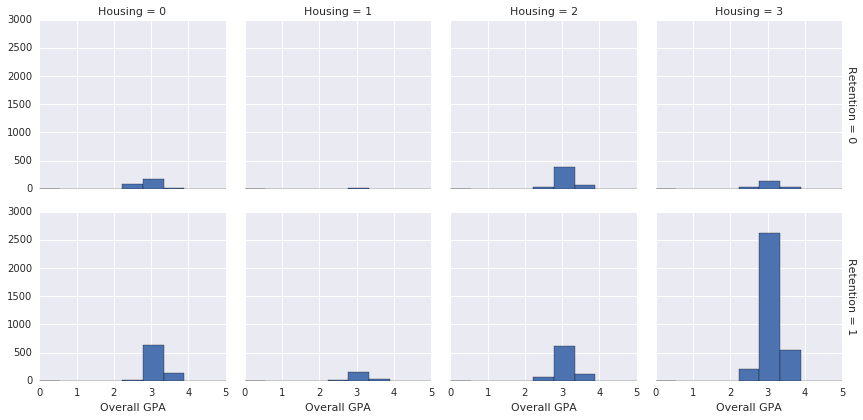

In [18]:
import seaborn as sns 
sns.set()

#2 = Off Campus
#3 = On Campus

grid = sns.FacetGrid(X_dataWithTarget, row="Retention", col="Housing", margin_titles=True)
grid.map(plt.hist, "Overall GPA", bins=np.linspace(0, 5, 10));

In [19]:
gender = X_dataWithTarget.groupby(['Retention']).count()
gender

,Marital Status,Applied Financial Aid,Received Financial Aid,Overall GPA,Housing,Club Memberships,Infirmary Visits
Retention,,,,,,,
0,991,991,991,991,991,991,991
1,5212,5212,5212,5212,5212,5212,5212


In [20]:
# Creating a data map and data plan


X_dataWithTarget_desc = X_dataWithTarget.groupby('Retention').describe()
X_dataWithTarget_desc_unstacked = X_dataWithTarget_desc.unstack()
X_dataWithTarget_desc['Overall GPA']

Retention       
0          count     991.000000
           mean        3.023611
           std         0.243565
           min         2.304839
           25%         2.850000
           50%         3.017143
           75%         3.200385
           max         3.751852
1          count    5212.000000
           mean        3.113918
           std         0.218624
           min         2.371250
           25%         2.965000
           50%         3.110812
           75%         3.262869
           max         3.890000
Name: Overall GPA, dtype: float64

In [21]:
# Creating a data map and data plan

X_dataWithTarget_desc_unstacked.loc[:,(slice(None),['count']),]

,Applied Financial Aid,Club Memberships,Housing,Infirmary Visits,Marital Status,Overall GPA,Received Financial Aid
,count,count,count,count,count,count,count
Retention,,,,,,,
0,991,991,991,991,991,991,991
1,5212,5212,5212,5212,5212,5212,5212
